In [1]:
# Este notebook não está atualizado

### Objetivo

Ser capaz de prezider a largura da sépada a partir de informações sobre o comprimento e largura da pétala e o comprimento da sépala. 

### Importando bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline

### Importando os dados

In [27]:
iris = pd.read_csv('iris.data', sep=',', header = None)

In [28]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
iris.shape

(150, 5)

In [35]:
iris.columns = ['sepal length','sepal width','petal length','petal width','class']

### Análise Exploratória

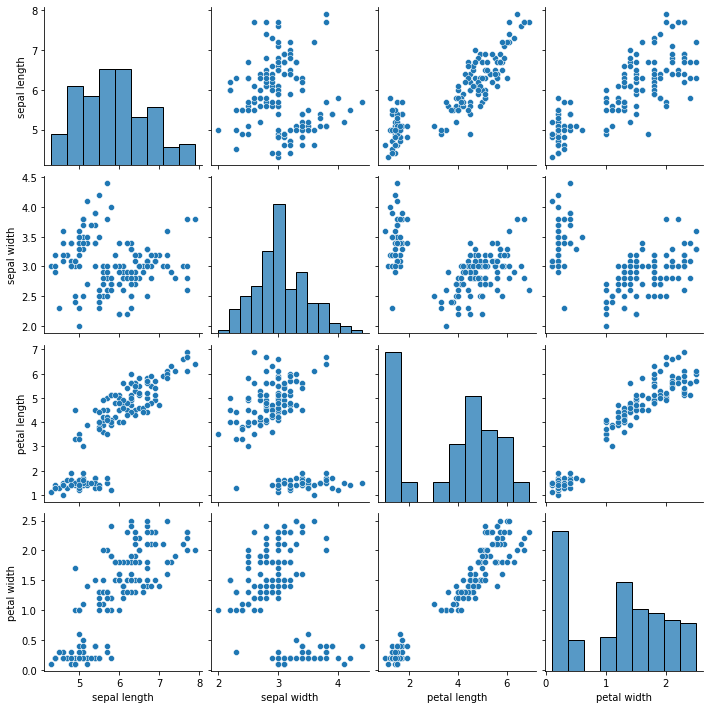

In [40]:
sns.pairplot(iris) # hue='class'

<AxesSubplot:>

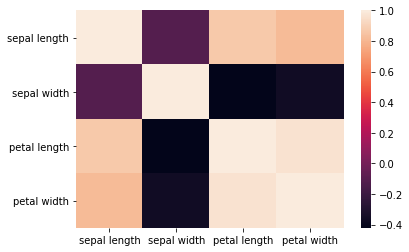

In [66]:
sns.heatmap(iris.corr())

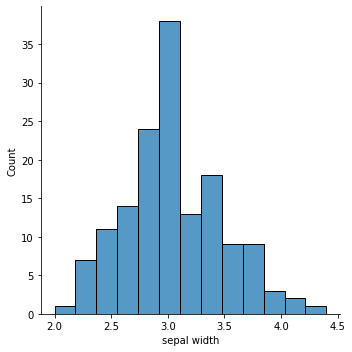

In [67]:
sns.displot(iris['sepal width'])

### Separando em treino e teste

In [46]:
y = iris['sepal width']
X = iris[['sepal length', 'petal width', 'petal length']]

In [ ]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=101)

### Treiando o modelo 

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
lm.coef_

array([ 0.58250141,  0.69019842, -0.6274542 ])

### Previsão (dados de teste)

In [57]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

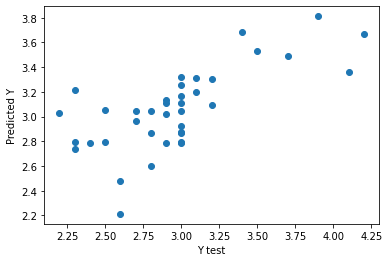

In [58]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

### Avaliando o modelo 

In [59]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.270165486700874
MSE: 0.11753622203170949
RMSE: 0.34283556121223696


### Resíduos 

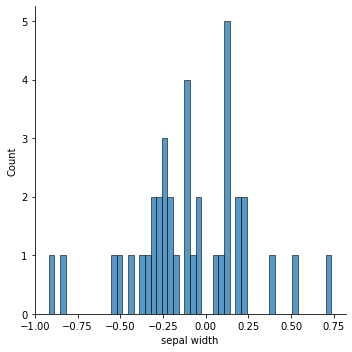

In [63]:
sns.displot((y_test-prediction), bins=50)

### Conclusão 

In [65]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
sepal length,0.582501
petal width,0.690198
petal length,-0.627454
